In [32]:
##2.2.1 数据的预处理

表2-1 美国某区域居民基本数据集
1.首先，观察数据集的结构，变量含义，变量类型
2.对数据集进行清洗，删除重复值，删除缺失值，删除异常值

In [33]:
#导入第三方包
import pandas as pd  # type: ignore #这是一个强大的数据处理库，提供了数据结构和处理数据的方法，用于数据分析。
import numpy as np  # type: ignore #这是一个用于数值计算的库，提供了各种数学函数和线性代数功能。
import seaborn as sns # type: ignore #这是一个基于matplotlib的可视化库，提供了更高级的可视化方法，用于数据可视化。


#数据读取
income=pd.read_excel(r'E:\Github\Python_Data_analysis-cleaning\第二章 从收入的预测分析开始\income.xlsx')

#查看是否存在缺失值
income.apply(lambda x:np.sum(x.isnull()))

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

缺失值的处理方式：
1.删除法->对于缺失的整一个观测值都要删除，比例小可以，但是比例大会删除有用信息，以及若是连续的数据，删除可能也会有问题

2.替换法->用一个常数去替换缺失值。（1）离散型，用众数;(2)数值型，可以考虑均值或者中位数。

3.插补法->利用未缺失的变量预测确实变量的值，如回归插补法，多重插补法，拉格朗日插补法。

In [34]:
#缺失值处理
#该缺失值的类型都为离散型变量
income.fillna(value={'workclass':income.workclass.mode()[0],
                     'occupation':income.occupation.mode()[0],
                     'native-country':income['native-country'].mode()[0],
},inplace=True)

In [35]:
#查看是否存在缺失值
income.apply(lambda x:np.sum(x.isnull()))

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

##2.2.2 数据的探索性分析
接下来对居民收入数据集进行简单的探索性分析，目的是为了了解数据背后的特征，如数据的集中趋势、离散趋势、数据形状和变量间的关系

基本统计值，如均值，中位数，众数

In [36]:
#数值型变量的统计描述
income.describe()

#个数（count）
#均值（mean）
#标准差（std）
#最小值（min）
#下四分位数(25%)
#中位数（50%）
#上四分位数（75%）
#最大值（max）


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
#离散型变量的统计描述
income.describe(include=['object'])


#个数（count）
#不同离散值的个数(unique)
#出现频次最高的离散值(top)
#出现频次最低的离散值(freq)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


数据的分布形状(如偏度、峰度等)可以通过可视化的方法进行展示，这里仅以被调查居民的年龄和每周工作小时数为例，绘制各自的分布形状图

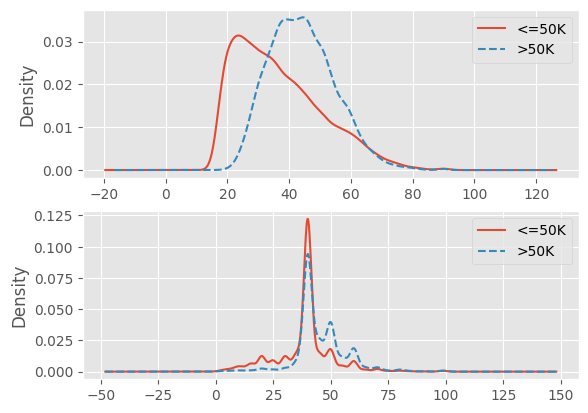

In [38]:
#导入绘图模块
import matplotlib.pyplot as plt 
#设置绘图风格
plt.style.use('ggplot')
#设置多图形的组合
fig,axes=plt.subplots(2,1)
#绘制不同收入水平下的年龄核密度图
income.age[income.income == ' <=50K'].plot(kind='kde',label='<=50K',ax=axes[0],
                                        legend=True,linestyle='-')
income.age[income.income == ' >50K'].plot(kind='kde',label='>50K',ax=axes[0],
                                       legend=True,linestyle='--')

#绘制不同收入水平下的每周工作小时数核密度图
income['hours-per-week'][income.income==' <=50K'].plot(kind='kde',label='<=50K',ax=axes[1],legend=True,linestyle='-')
income['hours-per-week'][income.income==' >50K'].plot(kind='kde',label='>50K',ax=axes[1],legend=True,linestyle='--')
plt.show()



解读：
第一幅图是，在不同的收入水平下，年龄核密度分布图，对于奶奶收入超过5万美金的剧名来说，他们的年龄的几乎呈现正态分布，而收入低于5万美金的居民，年龄呈现右偏的特征，即年龄偏大的居民人数要比年龄偏小的居民人数多。
第二幅图是，在不同的收入水平下，每周工作小时数的核密度分布图，很明显，两者的分布趋势非常相似，并且出现局部峰值。

同时，也可以针对离散型变量，对比居民的收入高低在性别、种族状态、家庭关系等方面的差异，进而可以发现这些离散变量是否影响收入水平

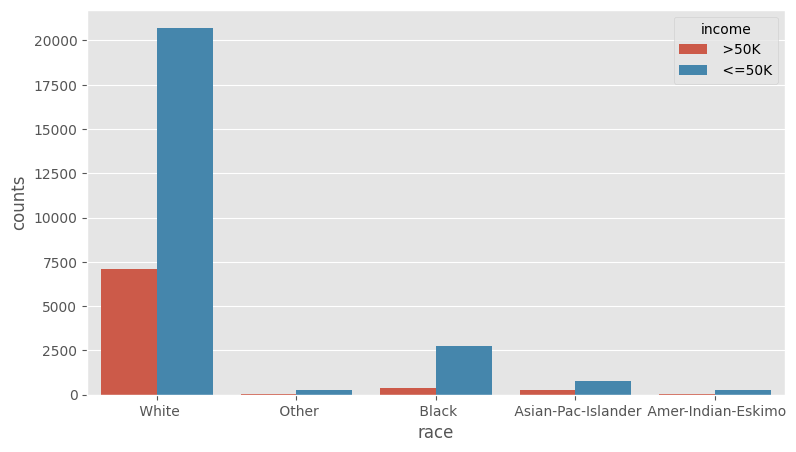

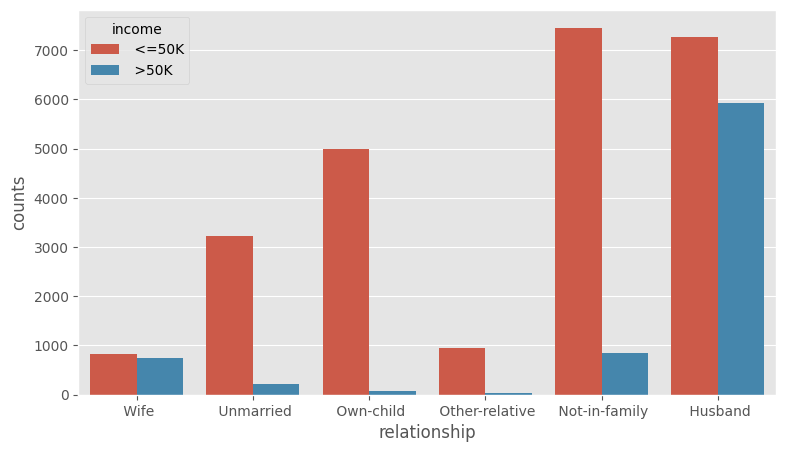

In [39]:
##构造不同收入水平各种族人数的数据
race=pd.DataFrame(income.groupby(by = ['race','income']).aggregate(np.size).loc[:,'age'])
#这段Python代码的作用是按照race和income的组合统计每个组合中age的分布情况，并输出一个DataFrame。
#实现原理：
#使用pandas库的DataFrame对象，通过传递income数据框的groupby()方法，按照'race'和'income'字段进行分组。
#使用aggregate()方法，对分组后的数据进行聚合操作，使用np.size()函数计算每个组中元素的个数。
#使用loc[:,'age']索引，选择'age'字段的数据，并将结果存储在一个新的DataFrame对象中。
#用途： 这个代码片段可以用于分析不同种族和收入水平人群的年龄分布情况。

##重设行索引
race = race.reset_index()

##变量重命名
race.rename(columns={'age':'counts'},inplace=True)

##排序
race.sort_values(by=['race','income'],ascending=False,inplace=True)

##构造不同收入水平下个家庭关系人数的数据
relationship=pd.DataFrame(income.groupby(by = ['relationship','income']).aggregate(np.size).loc[:,'age'])
relationship = relationship.reset_index()
relationship.rename(columns={'age':'counts'},inplace=True)
relationship.sort_values(by=['relationship','counts'],ascending=False,inplace=True)
#这段Python代码的目的是对某个数据集（这里称为`income`）中的人员的年龄分布进行统计分析。
#具体来说，它按照关系（relationship）和收入（income）两个维度进行分组，然后计算每个分组中年龄的分布情况。
#最后，按照关系和计数（counts）的顺序对结果进行排序。
#实现原理如下：
#1. 使用`pd.DataFrame`和`np.size`对`income`数据集按照关系和收入进行分组，并计算每个分组的年龄数量。
#2. 使用`reset_index`方法将结果转换为可序列为列的数据结构。
#3. 使用`rename`方法将计数列重命名为`counts`。
#4. 使用`sort_values`方法按照关系和计数对结果进行排序，并设置升序排序。

##设置图框比例，并绘图
plt.figure(figsize=(9,5))
sns.barplot(x='race',y='counts',hue='income',data=race)
plt.show()

plt.figure(figsize=(9,5))
sns.barplot(x='relationship',y='counts',hue='income',data=relationship)
plt.show()

解读：
上图，反映的是相同的种族下，居民年收入水平高低的人数差异；
下图，反映的是相同的家庭关系下，居民年收入水平高低的人数差异。
但无论怎么比较，都发现一个规律，即在某一个相同的水平下（如白人或未结婚人群中），年收入低于5w美金的人都要比年收入高于5w美金的人多，这个应该是抽样导致的差异（数据集中年收入低于5万和高于5万的居民的居民比例大致在75%；25%）


2.2.3数据建模

1.对离散变量重编码
（其实就是让字符转成0，1，2，3，4。男女转成0，1.季节春夏秋冬转成0，1，2，3，但是在进行回归为了避免线性，一般来说男女是需要表示女或者是男的就行）
前面提到，由于收入数据集中有很多离散型变量，这样的字符变量是不能直接用于建模的，需要对这些变量进行冲编码，关于重编码的方法有很多，如字符型的值转化为整数型的值、哑变量处理（0-1变量）、One-Hot热变量(类似于哑变量)等。

下面将采用“字符转数值”的方法对离散型变量进行冲编码

In [40]:
##离散变量重编码
for feature in income.columns:
    if income[feature].dtype == 'object':
        income[feature] = pd.Categorical(income[feature]).codes
        
income.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


解读：结果就是对字符型离散变量的重编码效果，所有的字符型变量都变成数值型变量了。
接下来就基于这个处理好的数据集对收入水平income进行预测

1.education和education-num是一一对应的，删除避免产生信息的冗余
2.fnlwgt变量代表的是一种序号，其对收入水平的高低并没有实际意义
故为了避免冗余信息和无意义变量对模型的影响，考虑将educaionh和fnlwgt从数据集中删除



In [41]:
##删除变量
income.drop(['education','fnlwgt'],axis=1,inplace=True)
income.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


现在呈现的就是处理干净的数据集，所要预测的变量就是income，该变量是二元变量，对其预测的实质就是对年收入水平的分类（一个新样本进来，通过分类模型，可以将该样本分为哪一种收入水平）
分类模型:Logistic模型、决策树、K近邻、朴素贝叶斯模型、支持向量机、随机森林、梯度提升树GBDT模型

对比才会知道哪种浩，接下来是K近邻和GBDT两种分类器

2.拆分数据集
交叉验证：
基于数据集income，将数据集拆分为训练集和测试集，训练集用于训练模型，测试集用于评估模型性能。避免分类器模型过拟合或欠拟合。
过拟合：训练集训练很好，但是测试集效果很差
欠拟合：训练集中效果就很差

通常是：75%训练集 25%测试——>但是如果得到一个较好的模型方法的话，应该重新的用100%的数据集去再次训练该模型。

In [42]:
##导入sklearn包中的函数
from sklearn.model_selection import train_test_split

##数据拆分
x_train,x_test,y_train,y_test = train_test_split(income.loc[:,'age':'native-country'],
                                                 income['income'],train_size=0.75,
                                                 random_state=1234)
print('训练数据集共有%d条观测' %x_train.shape[0])
print('测试数据集共有%d条观测' %x_test.shape[0])

训练数据集共有24420条观测
测试数据集共有8141条观测


运用随机抽样的方式，将数据集拆分为两个部分。
下面用拆分好的训练数据集开始构造K近邻和GBDT

3.默认参数的模型构建

In [43]:
#导入K近邻模型
from sklearn.neighbors import KNeighborsClassifier

#构建K近邻模型
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
print(kn.get_params())


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


首先，针对K近邻模型，我们直接调用了sklearn模块中的KNeighborsClassifier类，在这里我们使用的是默认的参数
即
1.让K近邻模型自动挑选最佳的搜寻近邻算法(algorithm='auto'),
2.p=2为使用欧式距离公式计算样本间的距离，
3..n_neighbors=5为选择5个最近邻，
4.weights='uniform'为使用均匀权重，


In [44]:
#导入GBDT模型的类
from sklearn.ensemble import GradientBoostingClassifier

#构建GBDT模型
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)
print(gbdt.get_params())



{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


首先，针对GBDT模型，我们直接调用了sklearn模块中的GradientBoostingClassifier类，在这里我们使用的是默认的参数
即
1.loss='deviance'为使用最小二乘法，
2.learning_rate=0.1为学习率，
3.n_estimators=100为迭代次数，
4.subsample=1.0为子采样率，
5.max_depth=3为最大深度，
6.min_samples_split=2为最小分割数，
7.min_samples_leaf=1为最小叶子数，
8.max_features=None为最大特征数，

使用默认的参数虽然是可行的，但往往达不到最优的拟合效果的
比如我们可以针对上面那么多的参数（如K近邻的K，p等）进行调整以找到一个较优的参数组合
一般想法：套用for循环更换如：K值
但是for循环的签到效率是比较慢的，我们可以直接使用Python的sklearn中“网格搜索法”，目的就是为了找到（某一个？）一个最佳的参数!!!
网格搜索是一项模型超参数优化技术，常用于优化三个或者更少数量的超参数，本质是一种穷举法。
如下:

4.模型网格搜索
针对K近邻模型的参数进行网格搜索，这里仅先考虑n_neighbors参数，即K值

In [45]:
#K近邻模型的参数网格搜索法
#导入网格搜索法的函数
from sklearn.model_selection import GridSearchCV
#选择不同的参数
k_options = list(range(1,12))
parameters = {'n_neighbors':k_options}
#搜索不同的K值
grid_kn = GridSearchCV(estimator= KNeighborsClassifier(),param_grid=parameters,cv=10,scoring='accuracy')
grid_kn.fit(x_train,y_train)
#结果输出
#grid_kn.grid_scores_, grid_kn.best_params_, grid_kn.best_score_ 
#新版本没有了grid_scores_，cv_results取而代之
#可以改成
#grid_kn.cv_results, grid_kn.best_params_, grid_kn.best_score_ 
#或者下面的会更加整洁
import pandas as pd
#获取结果
cv_results = grid_kn.cv_results_

#转换为数据框
df = pd.DataFrame(cv_results)

#显示数据框
print(df[['params', 'mean_test_score', 'rank_test_score']])

#打印最佳参数和最佳得分
print("Best parameters: ", grid_kn.best_params_)
print("Best score: ", grid_kn.best_score_)



                 params  mean_test_score  rank_test_score
0    {'n_neighbors': 1}         0.814210               11
1    {'n_neighbors': 2}         0.838043                9
2    {'n_neighbors': 3}         0.836568               10
3    {'n_neighbors': 4}         0.844963                5
4    {'n_neighbors': 5}         0.841769                8
5    {'n_neighbors': 6}         0.847461                1
6    {'n_neighbors': 7}         0.844144                7
7    {'n_neighbors': 8}         0.846478                3
8    {'n_neighbors': 9}         0.844799                6
9   {'n_neighbors': 10}         0.846601                2
10  {'n_neighbors': 11}         0.845782                4
Best parameters:  {'n_neighbors': 6}
Best score:  0.8474610974610975


简单解释一下 GridSearchCV()函数中几个参数的含义
estimator：模型对象，这里是K近邻模型的类
param_grid：用来制定模型需要搜索的参数列表对象，这里K近邻模型中n_neighbors参数的11种可能值
cv：交叉验证的次数，这里是10重交叉验证
scoring：评估指标，这里选取的是模型预测的准确率



在你的代码中，GridSearchCV函数的交叉验证（cross-validation）是在x_train和y_train数据集上进行的。具体来说，它会将x_train和y_train分成多个子集（这里是10个，因为你设置了cv=10），然后进行多轮训练和验证。在每一轮中，它会选择一个子集作为验证集，其余的子集作为训练集。这样，每个子集都有机会作为验证集被使用，从而更全面地评估模型的性能。

至于x_test和y_test，它们通常被用作最终的测试集，用于在模型训练和调参完成后，评估模型在未见过的数据上的表现。在你的代码中，并没有使用到这两个测试集。

接下来对GBDT模型进行网格搜索
搜索的参数包含三个，分别是模型的学习速率、生成的基础决策树个数和每个基础决策树的最大深度


In [46]:
#GBDT模型的参数网格搜索法
#导入网格搜索法的函数
learning_rate_options = [0.01,0.05,0.1]
max_depth_options = [3,5,7,9]
n_estimators_options = [100,300,500]
parameters = {'learning_rate':learning_rate_options,'max_depth':max_depth_options,'n_estimators':n_estimators_options}
grid_gbdt = GridSearchCV(estimator= GradientBoostingClassifier(),param_grid=parameters,cv=10,scoring='accuracy')
grid_gbdt.fit(x_train,y_train)
#结果输出
#grid_gbdt.grid_scores_, grid_gbdt.best_params_, grid_gbdt.best_score_
#新版本没有了grid_scores_，cv_results取而代之
#可以改成
#grid_kn.cv_results, grid_kn.best_params_, grid_kn.best_score_ 
#或者下面的会更加整洁
import pandas as pd
#获取结果
cv_results = grid_kn.cv_results_

#转换为数据框
df = pd.DataFrame(cv_results)

#显示数据框
print(df[['params', 'mean_test_score', 'rank_test_score']])

#打印最佳参数和最佳得分
print("Best parameters: ", grid_kn.best_params_)
print("Best score: ", grid_kn.best_score_)

                 params  mean_test_score  rank_test_score
0    {'n_neighbors': 1}         0.814210               11
1    {'n_neighbors': 2}         0.838043                9
2    {'n_neighbors': 3}         0.836568               10
3    {'n_neighbors': 4}         0.844963                5
4    {'n_neighbors': 5}         0.841769                8
5    {'n_neighbors': 6}         0.847461                1
6    {'n_neighbors': 7}         0.844144                7
7    {'n_neighbors': 8}         0.846478                3
8    {'n_neighbors': 9}         0.844799                6
9   {'n_neighbors': 10}         0.846601                2
10  {'n_neighbors': 11}         0.845782                4
Best parameters:  {'n_neighbors': 6}
Best score:  0.8474610974610975


上面跑了49m29.03s
               params  mean_test_score  rank_test_score
0    {'n_neighbors': 1}         0.814210               11
1    {'n_neighbors': 2}         0.838043                9
2    {'n_neighbors': 3}         0.836568               10
3    {'n_neighbors': 4}         0.844963                5
4    {'n_neighbors': 5}         0.841769                8
5    {'n_neighbors': 6}         0.847461                1
6    {'n_neighbors': 7}         0.844144                7
7    {'n_neighbors': 8}         0.846478                3
8    {'n_neighbors': 9}         0.844799                6
9   {'n_neighbors': 10}         0.846601                2
10  {'n_neighbors': 11}         0.845782                4
Best parameters:  {'n_neighbors': 6}
Best score:  0.8474610974610975


6.m模型预测与评估
  上文种，我们花费了用"干净“数据集的模型构建，下一步就是使用得到的分类器对测试数据集进行预测，进而验证模型在样本外的表现能力，同时，也可以从横向的角度来比较模型之间的好坏
  验证模型好坏的方法：
    1.对于预测的连续变量：常用的优均方误差（MSE）和均方根误差（RMSE）
    2.对于预测的分类变量：混淆矩阵的准确率、ROC曲线下的面积AUC、K-S值等

接下来，依次对上文构建的四种模型进行预测和评估


In [47]:
#7.默认的近邻模型
#K近邻模型在测试集上的预测
kn_pred = kn.predict(x_test)
print(pd.crosstab(kn_pred,y_test))

#模型得分
print("模型在训练集上的准准确率%f" %kn.score(x_train,y_train))
print("模型在测试集上的准准确率%f" %kn.score(x_test,y_test))

income     0     1
row_0             
0       5645   724
1        581  1191
模型在训练集上的准准确率0.889926
模型在测试集上的准准确率0.839700


如上所示，第一部分是混淆矩阵，矩阵中的行是模型的预测值，矩阵中的列是测试集的实际值，主对角线就是模型预测正确的数量(53645和1192),581和724就是模型预测错误的数量。
经过计算，得到第二部分的结论，集模型在训练集中的准确率为88.9%，在测试机上的错误录超过了16%（1-0.840），说明默认参数下的KNN模型可能存在过拟合的风险

    

模型的准确率就是基于混淆矩阵计算的，但是该方法存在一定的弊端，即如果数据本身存在一定的不平衡时（正负样本的比例差异较大），一定会导致准确率很高，但并不一定说明模型是理想的。
这里还要介绍一种常用的方法，就是绘制ROC曲线，冰脊轩曲线下的AUC值

<function matplotlib.pyplot.show(close=None, block=None)>

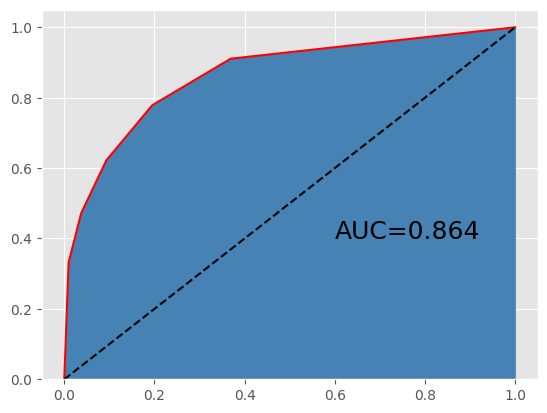

In [49]:
#导入模型评估模块
from sklearn import metrics 
#计算ROC曲线的x轴和y轴数据
fpr, tpr, _ = metrics.roc_curve(y_test, kn.predict_proba(x_test)[:,1])
#绘制ROC曲线
plt.plot(fpr, tpr, linestyle = 'solid',color='red')
#添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
#绘制参考线
plt.plot([0,1],[0,1],linestyle = 'dashed',color='black')
#往图中添加文本
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr, tpr),fontdict = dict(size=18))
plt.show

绘制了ROC曲线，经计算得知，该曲线下的面积AUC为0.864
用AUC来评估模型的好坏，AUC的值越大，说明模型越好，反之亦然。
一般而言，AUC的值超过0.8时，基本上就可以认为模型比较合理。所以基于默认参数的K近邻模型在居民收入数据集上的表现还是理想的

8.网格搜索的K近邻模型

income     0     1
row_0             
0       5826   866
1        400  1049
模型在训练集上的准准确率0.882596
模型在测试集上的准准确率0.844491


<function matplotlib.pyplot.show(close=None, block=None)>

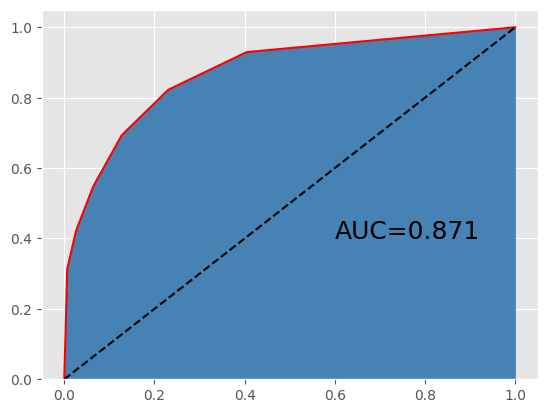

In [50]:
#预测测试集
grid_kn_pred = grid_kn.predict(x_test) #因为上面已经经过网格搜索，会直接使用最优的参数配置
print(pd.crosstab(grid_kn_pred,y_test))

#模型得分
print("模型在训练集上的准准确率%f" %grid_kn.score(x_train,y_train))
print("模型在测试集上的准准确率%f" %grid_kn.score(x_test,y_test))

#计算ROC曲线的x轴和y轴数据
fpr, tpr, _ = metrics.roc_curve(y_test, grid_kn.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid',color='red')
#添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
#绘制参考线
plt.plot([0,1],[0,1],linestyle = 'dashed',color='black')
#往图中添加文本
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr, tpr),fontdict = dict(size=18))
plt.show


相比于默认参数的K近邻模型来说，经过网格搜索后的模型在训练数据集上的准确率下降，但在测试数据集上的准确率提高了，这也是我们所期望的，说明优化后的模型在预测效果更加优秀，并且两者差异的缩小也能降低模型过拟合的可能。
再来看看ROC曲线下的面积，网格后的K近邻模型对应的AUC为0.871，相比于原来的KNN回提高一点。
所以，从模型的稳定性来看，网格搜索后的K近邻模型比原始的K近邻模型更加的优秀

10.默认的GBDT模型

income     0     1
row_0             
0       5862   784
1        364  1131
模型在训练集上的准准确率0.869451
模型在测试集上的准准确率0.858985


<function matplotlib.pyplot.show(close=None, block=None)>

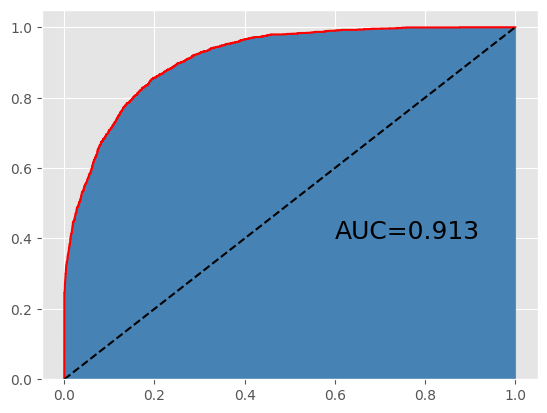

In [51]:
#预测测试集
gbdt_pred = gbdt.predict(x_test)
print(pd.crosstab(gbdt_pred,y_test))

#模型得分
print("模型在训练集上的准准确率%f" %gbdt.score(x_train,y_train))
print("模型在测试集上的准准确率%f" %gbdt.score(x_test,y_test))

#计算ROC曲线的x轴和y轴数据
fpr, tpr, _ = metrics.roc_curve(y_test, gbdt.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid',color='red')
#添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
#绘制参考线
plt.plot([0,1],[0,1],linestyle = 'dashed',color='black')
#往图中添加文本
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr, tpr),fontdict = dict(size=18))
plt.show


如上结果所示，集成算法GBDT在测试集上的表现表现明显要比K近邻算法优秀，这就是基于多颗决策树进行投票的优点。该模型在训练集和测试集上的表现都非常好，准确率均超过了85%，而AUC值也是前面两种模型中最高的优0.913

11.网格搜索后的GBDT模型


income     0     1
row_0             
0       5834   654
1        392  1261
模型在训练集上的准准确率0.897379
模型在测试集上的准准确率0.871515


<function matplotlib.pyplot.show(close=None, block=None)>

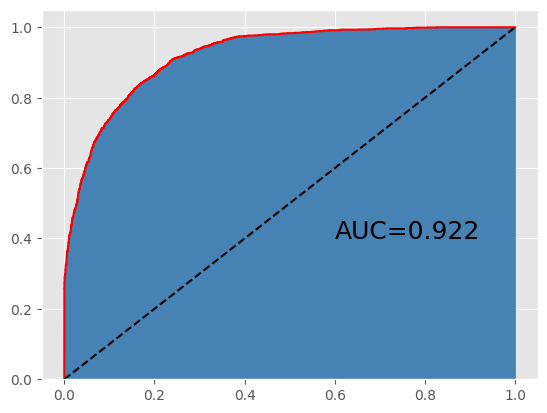

In [52]:
#预测测试集
grid_gbdt_pred = grid_gbdt.predict(x_test)
print(pd.crosstab(grid_gbdt_pred,y_test))

#模型得分
print("模型在训练集上的准准确率%f" %grid_gbdt.score(x_train,y_train))
print("模型在测试集上的准准确率%f" %grid_gbdt.score(x_test,y_test))

#计算ROC曲线的x轴和y轴数据
fpr, tpr, _ = metrics.roc_curve(y_test, grid_gbdt.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid',color='red')
#添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
#绘制参考线
plt.plot([0,1],[0,1],linestyle = 'dashed',color='black')
#往图中添加文本
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr, tpr),fontdict = dict(size=18))
plt.show


如上展示的是基于网格搜索后的GBDT模型的表现，从准确率来看，是4个模型中表现最佳的，该模型在训练集上的准确率接近90%，同时，在测试机上的准确率也超过了87%；
从绘制的ROC曲线来看，AUC的值也是最高的超过了0.92


    不论是K近邻模型，还是梯度提升树GBDT模型，都可以通过网格搜索法找到各自的最佳模型参数，而且这些最佳的参数的组合一般会使模型比较优秀和健壮。所以，纵向比较默认参数的模型和网格搜索后的最佳模型，后者可能是比较好的选择（尽管后者运行的时间比较多）；横向比较单一模型和集成模型，集成模型一般会比单一模型表现优秀。